In [3]:
%matplotlib inline
from matplotlib import style, figure
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
stat = Base.classes.station
meas = Base.classes.measurement


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
row_m = session.query(meas).first()
row_m.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x13345ca2cf8>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [12]:
row_s = session.query(stat).first()
row_s.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x13345cd2470>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'longitude': -157.8168,
 'station': 'USC00519397'}

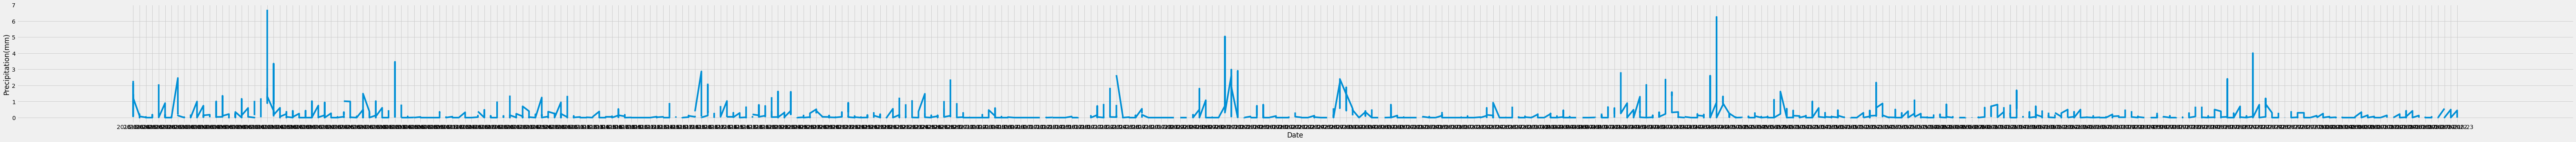

In [13]:
# Find the most recent date in the data set.
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores

most_recent = session.query(meas.date, meas.prcp).order_by(desc(meas.date))

last_year_prcp = most_recent.filter(meas.date > '2016-08-23')

# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df = pd.DataFrame(last_year_prcp)

# Sort the dataframe by date

new_prcp = prcp_df.set_index('date')
prcp_df = new_prcp.sort_values('date', ascending=True)

y_val = prcp_df['prcp']
x_val = prcp_df.index

# Use Pandas Plotting with Matplotlib to plot the data

plt.figure(figsize=(100,5))
plt.plot(x_val, y_val)
plt.xlabel('Date')
plt.ylabel('Precipitation(mm)')
plt.show()


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(stat.id).count()
station_count

9

In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

most_active_list = session.query(meas.station, func.count(meas.station)).\
group_by(meas.station).order_by(func.count(meas.station).desc()).all()

for x in most_active_list:
    print(x)
    

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [17]:
most_active_station = session.query(meas.station, meas.tobs).filter(meas.station == 'USC00519281')

In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

min_temp = session.query(meas.date, meas.station, meas.tobs).filter(meas.station == 'USC00519281').order_by(desc(meas.date))#.filter(func.min(meas.tobs))

for y in min_temp:
    print(y)

#min_temp = session.query(meas.station, meas.tobs).filter(meas.station == 'USC00519281').filter(func.max(meas.tobs))
#avg_temp = session.query(meas.station, meas.tobs).filter(meas.station == 'USC00519281').filter(func.avg(meas.tobs))


('2017-08-18', 'USC00519281', 79.0)
('2017-08-17', 'USC00519281', 76.0)
('2017-08-16', 'USC00519281', 76.0)
('2017-08-15', 'USC00519281', 77.0)
('2017-08-14', 'USC00519281', 77.0)
('2017-08-13', 'USC00519281', 77.0)
('2017-08-06', 'USC00519281', 83.0)
('2017-08-05', 'USC00519281', 82.0)
('2017-08-04', 'USC00519281', 77.0)
('2017-07-31', 'USC00519281', 76.0)
('2017-07-30', 'USC00519281', 81.0)
('2017-07-29', 'USC00519281', 82.0)
('2017-07-28', 'USC00519281', 81.0)
('2017-07-27', 'USC00519281', 76.0)
('2017-07-26', 'USC00519281', 75.0)
('2017-07-25', 'USC00519281', 77.0)
('2017-07-24', 'USC00519281', 75.0)
('2017-07-23', 'USC00519281', 82.0)
('2017-07-22', 'USC00519281', 77.0)
('2017-07-21', 'USC00519281', 77.0)
('2017-07-20', 'USC00519281', 77.0)
('2017-07-19', 'USC00519281', 76.0)
('2017-07-18', 'USC00519281', 76.0)
('2017-07-17', 'USC00519281', 76.0)
('2017-07-16', 'USC00519281', 80.0)
('2017-07-15', 'USC00519281', 80.0)
('2017-07-14', 'USC00519281', 76.0)
('2017-07-13', 'USC00519281'

('2011-08-21', 'USC00519281', 75.0)
('2011-08-20', 'USC00519281', 81.0)
('2011-08-19', 'USC00519281', 78.0)
('2011-08-18', 'USC00519281', 77.0)
('2011-08-17', 'USC00519281', 77.0)
('2011-08-16', 'USC00519281', 77.0)
('2011-08-15', 'USC00519281', 80.0)
('2011-08-14', 'USC00519281', 77.0)
('2011-08-13', 'USC00519281', 73.0)
('2011-08-12', 'USC00519281', 78.0)
('2011-08-11', 'USC00519281', 80.0)
('2011-08-10', 'USC00519281', 79.0)
('2011-08-09', 'USC00519281', 73.0)
('2011-08-08', 'USC00519281', 78.0)
('2011-08-07', 'USC00519281', 79.0)
('2011-08-06', 'USC00519281', 78.0)
('2011-08-05', 'USC00519281', 75.0)
('2011-08-04', 'USC00519281', 75.0)
('2011-08-03', 'USC00519281', 77.0)
('2011-08-02', 'USC00519281', 74.0)
('2011-08-01', 'USC00519281', 73.0)
('2011-07-31', 'USC00519281', 76.0)
('2011-07-30', 'USC00519281', 77.0)
('2011-07-29', 'USC00519281', 72.0)
('2011-07-28', 'USC00519281', 73.0)
('2011-07-27', 'USC00519281', 73.0)
('2011-07-26', 'USC00519281', 73.0)
('2011-07-25', 'USC00519281'

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_year_tobs = session.query(meas.date, meas.station, meas.tobs).filter(meas.station == 'USC00519281').filter(meas.date >= '2016-08-19').order_by(desc(meas.date))

for x2 in last_year_tobs:
    print(x2)

('2017-08-18', 'USC00519281', 79.0)
('2017-08-17', 'USC00519281', 76.0)
('2017-08-16', 'USC00519281', 76.0)
('2017-08-15', 'USC00519281', 77.0)
('2017-08-14', 'USC00519281', 77.0)
('2017-08-13', 'USC00519281', 77.0)
('2017-08-06', 'USC00519281', 83.0)
('2017-08-05', 'USC00519281', 82.0)
('2017-08-04', 'USC00519281', 77.0)
('2017-07-31', 'USC00519281', 76.0)
('2017-07-30', 'USC00519281', 81.0)
('2017-07-29', 'USC00519281', 82.0)
('2017-07-28', 'USC00519281', 81.0)
('2017-07-27', 'USC00519281', 76.0)
('2017-07-26', 'USC00519281', 75.0)
('2017-07-25', 'USC00519281', 77.0)
('2017-07-24', 'USC00519281', 75.0)
('2017-07-23', 'USC00519281', 82.0)
('2017-07-22', 'USC00519281', 77.0)
('2017-07-21', 'USC00519281', 77.0)
('2017-07-20', 'USC00519281', 77.0)
('2017-07-19', 'USC00519281', 76.0)
('2017-07-18', 'USC00519281', 76.0)
('2017-07-17', 'USC00519281', 76.0)
('2017-07-16', 'USC00519281', 80.0)
('2017-07-15', 'USC00519281', 80.0)
('2017-07-14', 'USC00519281', 76.0)
('2017-07-13', 'USC00519281'

# Close session

In [8]:
# Close Session
session.close()